# README:<br>
This notebook was made by PhD. Junior A. Koch and PhD. Luana B. Peres as a Machine Learning introduction course for Bioinformatics PhD candidates at Universidade Federal de Santa Catarina on spring of 2018.<br>
Esse notebook foi criado por PhD. Junior A. Koch e PhD. Luana B. Peres como curso introdutório de Machine Learning para doutorandos em Bioinformática na Universidade Federal de Santa Catarina durante a primavera de 2018.

# Conteúdo
-  Instalação - Anaconda
    -  Jupyter notebook
-  Introdução aos conceitos de machine learning
    -  O que é e para que serve?
    -  Tipos de machine learning
    -  Ciclo: Dados, Modelo, Métrica e Teste
    -  Tipos de dados
    -  Overfitting e underfitting
    -  Métricas
-  [Classificação](#Classifica--o)
    -  Temos que classificar
    -  Como funciona?
    -  Wisconsin Breast Cancer Dataset
-  [Regressão](#Regress-o)
    -  Como funciona?
-  HIV cleavage
-  Gene expression

# Instalação - Anaconda

## Jupyter notebook
Tutoriais de um notebook: 
-   http://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb
-   http://webserver2.tecgraf.puc-rio.br/~mgattass/fcg/T1PythonInstall.pdf
-   https://www.dataquest.io/blog/jupyter-notebook-tutorial/
-   https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed


# Introdução aos conceitos de machine learning

## O que é e para que serve?

*"Machine Learning é uma area de estudo que dá a computadores a habilidade de aprender sem serem explicitamente programados." - Arthur Samuel, 1959*              
O objetivo fundamental de algoritmos de *Machine Learning* é aprender a partir de dados e generalizar além do *training set* para interpretar com sucesso dados nunca antes vistos.

Filtro de spam, detecção de fraude de cartão de crédito, sistema de recomendação de filmes da Netflix e sugestão de amizades do Facebook são exemplos de programas de Machine Learning.

<img src="./images/ML_approach.png" alt="MachineLearningApproach" width="500"/>

## Tipos de machine learning

Os sistemas de Machine Learning podem ser divididos em diferentes categorias de acordo com o tipo e a quantidade de supervisão que eles recebem durante o treinamento. 


***Supervised learning:*** O modelo é treinado com uma série de exemplos contendo os dados de entrada (input) e os respectivos resultados esperados (aqui chamados *labels*). Portanto, o objetivo da aprendizagem supervisionada é aprender uma função que melhor aproxime a relação entre input e resultado, e que então seja capaz de predizer um valor correspondente para qualquer novo e desconhecido input. 

<img src="./images/Supervised_Learning.png" alt="SupervisedLearning" width="600"/>

Alguns dos mais importantes algoritmos de *supervised learning* são:
    + k-Nearest Neighbors (Classificação)    
    + Linear Regression (Regressão)      
    + Logistic Regression (Classificação)
    + Support Vector Machines (SVMs) (Classificação e Regressão)
    + Decision Trees and Random Forests (Classificação e Regressão)
    + Neural Networks (Classificação e Regressão)
    
                                                         
***Unsupervised learning:*** Os modelos são treinados com *unlabeled data*, ou seja, os dados alimentados ao modelo não contêm os resultados rotulados, ou seja, o sistema tenta aprender sem um professor. Portanto seu objetivo é inferir a estrutura natural presente dentro de um conjunto de dados. 

<img src="./images/Unsupervised_Learning.png" alt="UnsupervisedLearning" width="450"/>

Alguns dos mais importantes algoritmos de *unsupervised learning* são:
    + k-Means (Clustering)    
    + Hierarchical Cluster Analysis, HCA (Clustering)      
    + Expectation Maximization (Clustering)
    + Apriori (Assiciation)
    + Eclat (Association)


***Semisupervides learning:*** Alguns algoritmos conseguem lidar com dados parcialmente *labeled*. Nesse caso, os modelos são geralmente treinados com muitos dados *unlabeled* a alguns poucos *labeled*. A maioria dos algoritmos de *semisupervised learning* são uma combinação de algoritmos supervisionados e não-supervisionados.             


***Reinforcement learning:*** O sistema de aprendizagem, chamado de agente neste contexto, pode observar o ambiente, selecionar e executar ações e obter recompensas em retorno (ou penalidades na forma de recompensas negativas). Deve então aprender por si mesmo qual é a melhor estratégia, chamada política, para obter a maior recompensa ao longo do tempo. Uma política define qual ação o agente deve escolher quando estiver em uma determinada situação.           



Na prática, os sistemas mais utilizados são *Supervised Learning* e "Unsupervised Learning*.            
Em resumo:                    

<img src="./images/Tipos_ML.png" alt="ML_types" width="1000"/>

## Passos: Dados, Modelo, Métrica e Teste

## Overfitting e underfitting

Se o modelo tem uma boa performance no *training data* mas generaliza mal de acordo com as métricas da validação cruzada, então o modelo está **overfitting**. Se o modelo tem uma má performance em ambos, então ele está **underfitting**.

## Métricas

# Classificação<a id='Classificação'></a>

## Temos que classificar

Para entendermos como funciona um algoritmo de classificação vamos usar um exemplo bem simples:

Um pesquisador foi a campo coletar dados sobre dois pokemons, Pichu e Pikachu. Este pesquisador determinou que as características mais relevantes para classificar entre um dos dois são o comprimento da cauda e a largura das orelhas.

|Pichu                                                  | Pikachu                                                   |
|:-----------------------------------------------------:|:---------------------------------------------------------:|
|<img src="./images/pichu.png" alt="Pichu" width="100"/>|<img src="./images/pikachu.png" alt="Pikachu" width="100"/>|

Os dados que ele coletou estão salvos no arquivo abaixo.

In [217]:
import numpy as np    # biblioteca científica
import pandas as pd   # biblioteca para visualização e manipulação de dados
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# pokemon dataset
pokemon = pd.read_csv(r".\datasets\outros\pokemon.csv")
pokemon = pokemon.drop('Unnamed: 0',axis=1)
pokemon_test = pd.read_csv(r".\datasets\outros\pokemon_test.csv")
pokemon_test = pokemon_test.drop('Unnamed: 0',axis=1)

In [218]:
pokemon.head()

,Pokemon,Comprimento Cauda (cm),Largura Orelha (cm)
0,0,17.3,17.2
1,1,24.3,12.9
2,0,15.5,12.6
3,1,22.2,12.0
4,1,21.2,13.3


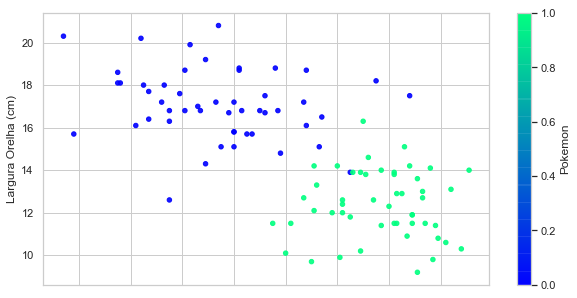

In [219]:
pokemon.plot(figsize=(10,5),kind="scatter", x="Comprimento Cauda (cm)", y="Largura Orelha (cm)", alpha=0.9,c='Pokemon',colormap='winter');

Se encontrarmos um jeito de automaticamente separar as duas categorias com um reta, por exemplo:

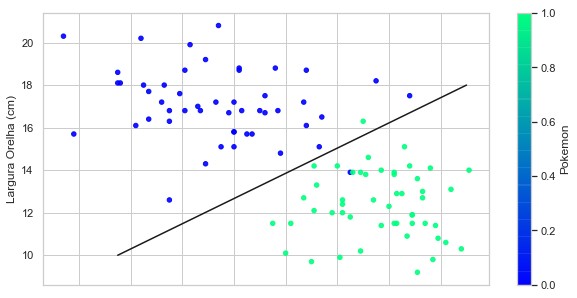

In [220]:
pokemon.plot(figsize=(10,5),kind="scatter", x="Comprimento Cauda (cm)", y="Largura Orelha (cm)", alpha=0.9,c='Pokemon',colormap='winter');
plt.plot([13.5,27],[10,18],'k');

Sabemos que os dados que corresponderem a pontos superiores a reta são de Pichu (0) e pontos inferiores a reta são de Pikachu (1).<br>
Claro que neste caso erraríamos ao analisar dois pontos, como você pode observar no gráfico, mas é um preço pequeno para poder automatizar este processo.<br>

A representação matemática da reta acima, $y = ax+b$, pode ser encontrada facilmente quando há apenas duas variáveis no nosso problema, entretanto problemas reais podem possuir milhares de variáveis. Para nós humanos isso se torna inviável.

Vamos então usar machine learning para descobrir qual é esta reta e quão perto ela chega de classificar corretamente estes pokemons. Para fins de comparação usaremos os algoritmos LogisticRegression e KNeighborsClassifer. Neste momento não vamos detalhar muito o que está sendo feito, pois este exemplo é mais ilustrativo, nas seções adiante nos aprofundaremos mais.

In [221]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

poke_target = pokemon['Pokemon'].copy()
poke_data = pokemon.drop('Pokemon',axis=1)
poke_target_test = pokemon_test['Pokemon'].copy()
poke_data_test = pokemon_test.drop('Pokemon',axis=1)
knn = KNeighborsClassifier(n_neighbors=3)
log = LogisticRegression()

In [222]:
# treina o classificador com os dados
knn.fit(poke_data, poke_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Ainda não vamos entrar em detalhes do funcionamento específico deste algoritmo, apenas vamos dizer que ele verifica, para um determinado sample, os 3 samples mais próximos dele e analisa a classificação destes pontos.<br>

Com o treino feito vamos usar o que o algoritmo aprendeu e tentar prever o resultado de dados ainda desconhecidos, em 'pokemon_test'.

In [223]:
poke_predict = knn.predict(poke_data_test)
print(poke_predict)

[0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1
 1 0 0 1 0 1 1 0 0 1 1 0 1]


In [224]:
# Verificando a acurácia média
poke_score = knn.score(poke_data_test,poke_target_test)
print(poke_score)

0.98


In [225]:
from sklearn.metrics import confusion_matrix
confusion_matrix(poke_predict,poke_target_test)

array([[24,  0],
       [ 1, 25]], dtype=int64)

A confusion matrix é uma maneira melhor de compreender os resultados da previsão. No nosso caso:
-  TP significa que prevemos corretamente 24 samples da classe de valor 1 (Pikachu);
-  FN significa que prevemos erroneamente 0 samples da classe de valor 2 (Pichu);
-  FP significa que prevemos erroneamente 1 sample da classe de valor 1 (Pikachu);
-  TN significa que prevemos corretamente 25 samples da classe de valor 2 (Pichu).

Ou seja, o único erro foi proveniente de uma amostra que o algoritmo identificou como sendo um Pichu, mas na verdade era um Pikachu. Um caso ideal é composto apenas por valores na diagnal principal da matriz.

![alt text](.\images\confusion_matrix.png "Confusion Matrix")

In [226]:
# verificando com outros algoritmo
log.fit(poke_data, poke_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [227]:
poke_score_log = log.score(poke_data_test,poke_target_test)
print(poke_score_log)

0.96


In [228]:
poke_predict_log = log.predict(poke_data_test)
print(poke_predict_log)

[0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1
 1 0 0 1 0 1 1 0 0 0 1 0 1]


In [229]:
from sklearn.metrics import confusion_matrix
confusion_matrix(poke_predict_log,poke_target_test)

array([[24,  1],
       [ 1, 24]], dtype=int64)

Note que o resultado com este algoritmo foi diferente, um pouco pior, mas isso não significa que o KNeighborsClassifier sempre será melhor que  LogisticRegression. Cada problema é único e devemos testar vários algoritmos afim de determinar qual especifica um modelo melhor.<br>

Este exemplo foi bem simples, agora é hora de nos aprofundarmos em problemas mais complexos onde precisaremos de mais ferramentas para fazer boas previsões bem como outros algoritmos.

## Wisconsin Breast Cancer Dataset
Este é um conjunto de dados reais que contem medidas clínicas relacionadas ao cancer de mama. Há duas classes possíveis como resultado da análise: benigno e maligno. Nossa tarefa é utilizar machine learning para prever se um cancer é maligno ou não baseado nas medidas do tecido. Se esta tarefa for bem sucedida não será necessário gastos extras como o tempo de especialistas ou exames clínicos adicionais.<br>
<br>
Vamos utilizar uma versão um pouco modificada da original, http://mlr.cs.umass.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)<br>
<br>
Citation Request:
   This breast cancer databases was obtained from the University of Wisconsin    Hospitals, Madison from Dr. William H. Wolberg.  If you publish results when using this database, then please include this information in your acknowledgements.  Also, please cite one or more of:
   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.

   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
      via linear programming: Theory and application to medical diagnosis", 
      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
      Li, editors, SIAM Publications, Philadelphia 1990, pp 22-30.

   4. K. P. Bennett & O. L. Mangasarian: "Robust linear programming 
      discrimination of two linearly inseparable sets", Optimization Methods
      and Software 1, 1992, 23-34 (Gordon & Breach Science Publishers).

In [230]:
import numpy as np    # biblioteca científica
import pandas as pd   # biblioteca para visualização e manipulação de dados
# importamos o dataset
cancer = pd.read_csv(r".\datasets\Wisconsin\data.csv")
cancer = cancer.drop('Unnamed: 32', axis=1)

In [231]:
# verificando o que há no dataset
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [232]:
# o dataset contém as medidas clínicas, neste caso temos 30 medidas (features) para cada uma das 569 amostras (samples)
cancer.shape

(569, 32)

Vamos detalhar as informações contidas neste dataset:
-  'id' é simplesmente uma identificação de cada amostra, não precisamos desta coluna;
-  'diagnosis' traz a informação sobre o tumor ser benigno (B) ou maligno (M). Esta coluna é chamada de 'target' e é esta que pretendemos prever com o algoritmo;
-  as demais colunas contêm as medidas clínicas sobre o tumor, estude-as por uns instantes.

Utilizando o método 'info()' no dataset podemos identificar o nome dos features, a quantidade de dados que cada um possui e que tipo de dado é este.<br>
Vemos que todos os features possuem 569 entradas, isso é bom. Muitas vezes encontramos datasets com dados incompletos e precisamos utilizar estratégicas 'espertas' do ponto de vista estatístico para resolver este problema. Algumas vezes adicionamos algum valor nos faltantes (como a média) ou podemos descartar o sample com problema. Vemos que 'id' possui os dados como 'int64', isto se refere a números inteiros, enquanto os demais features são 'float64', números reais (com casas decimais). Já 'diagnosis' tem dados do tipo 'object', ou seja, texto.

In [233]:
# verificando o nome de cada coluna
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [234]:
# descartando 'id'
cancer = cancer.drop('id', axis=1)

In [235]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [236]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

O método 'describe()' nos mostra algumas informações sobre as colunas numéricas:
-  'count' - quantas entradas o feature possui;
-  'mean' - a média das medidas;
-  'std' - o desvio padrão;
-  'min' - o valor mínimo encontrado;
-  'max' - o valor máximo;
-  '25%' - o valor de separa os 25% menores valores;
-  '50%' - o valor de separa as medidas em dois, mais conhecido como mediana;
-  '75%' - o valor de separa os 75% menores valores;

In [237]:
cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [238]:
# visualizando os dados da primeira amostra
cancer.iloc[0]

diagnosis                         M
radius_mean                   17.99
texture_mean                  10.38
perimeter_mean                122.8
area_mean                      1001
smoothness_mean              0.1184
compactness_mean             0.2776
concavity_mean               0.3001
concave points_mean          0.1471
symmetry_mean                0.2419
fractal_dimension_mean      0.07871
radius_se                     1.095
texture_se                   0.9053
perimeter_se                  8.589
area_se                       153.4
smoothness_se              0.006399
compactness_se              0.04904
concavity_se                0.05373
concave points_se           0.01587
symmetry_se                 0.03003
fractal_dimension_se       0.006193
radius_worst                  25.38
texture_worst                 17.33
perimeter_worst               184.6
area_worst                     2019
smoothness_worst             0.1622
compactness_worst            0.6656
concavity_worst             

In [239]:
# visualizando os dados das três primeiras amostras
cancer.iloc[0:3]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [240]:
# visualizando os dados da coluna 'diagnosis'.
cancer['diagnosis']

0      M
1      M
2      M
3      M
4      M
5      M
6      M
7      M
8      M
9      M
10     M
11     M
12     M
13     M
14     M
15     M
16     M
17     M
18     M
19     B
20     B
21     B
22     M
23     M
24     M
25     M
26     M
27     M
28     M
29     M
      ..
539    B
540    B
541    B
542    B
543    B
544    B
545    B
546    B
547    B
548    B
549    B
550    B
551    B
552    B
553    B
554    B
555    B
556    B
557    B
558    B
559    B
560    B
561    B
562    M
563    M
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [241]:
# visualizando a contagem da coluna 'diagnosis'.
cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Vamos separar o dataset em dois (descartando 'id'):
    X são os dados dos features usados para o treinamento;
    y é o dado que queremos prever, o target.

In [242]:
y = cancer.diagnosis.copy()
X = cancer.drop(['diagnosis'], axis=1)

In [243]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [244]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Visualizando os dados

In [245]:
# bibliotecas para gráficos
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Number of Benign:  357
Number of Malignant :  212


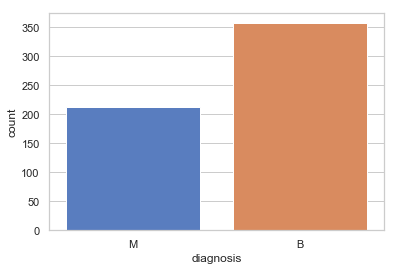

In [246]:
# histograma de 'diagnosis'
ax = sns.countplot(y,label="Count")
B, M = cancer['diagnosis'].value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

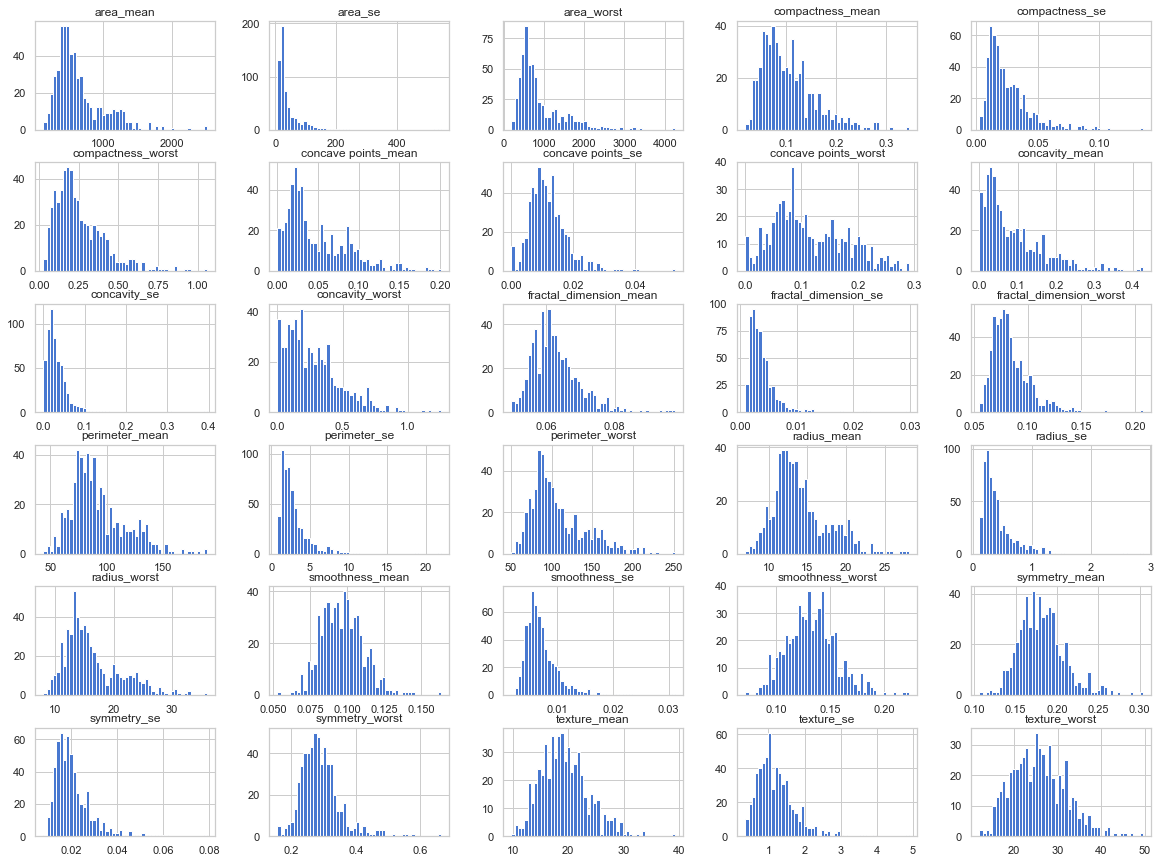

In [247]:
# histograma dos features
cancer.hist(bins=50, figsize=(20,15));

## Antes do treino
Supondo que estamos contentes com os dados do jeito que estão, vamos finalmente para machine learning propriamente dito.

Agora que temos alguma familiaridade com os dados vamos separar o dataset em dois, 'train set' e 'test set'. O dataset 'train' é aquele que vamos utilizar para treinar o algoritmo de machine learning, após isso precisamos de alguma medida da qualidade de nossas previsões fazendo o algoritmo prever o resultado de dados desconhecidos por ele, ou seja, o dataset 'test'. É comum que cerca de 20% dos dados seja aleatoriamente definido como o 'test set'. Um jeito simples de fazer isso é utilizar a função 'train_test_split' da bibliotec de machine learning 'scikit-learn'.

In [248]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(cancer, test_size=0.2, random_state=42)

In [249]:
print(train.shape)
print(test.shape)

(455, 31)
(114, 31)


In [250]:
train.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,B,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,...,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,M,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,...,26.68,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,B,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,...,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,B,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,12.25,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,B,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,...,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


In [251]:
X_train = train.drop('diagnosis',axis=1)
X_test = test.drop('diagnosis',axis=1)
y_train = train.diagnosis.copy()
y_test = test.diagnosis.copy()

## Pré-processamento

É importante analisar a distribuição dos dados para verificar se estão 'normalmente' distribuídos e se há dados ruins 'outliers'. Para que o modelo que vamos criar seja estatisticamente acurado devemos aplicar algumas transformações a estes dados:
-  normalization - faz com que todos os features possuam valores entre 0 e 1, ou seja, a faixa variação dos valores de cada feature deve ser a mesma. Por exemplo, 'area_mean' varia aproximadamente entre 0 e 2500, enquanto 'fractal_dimension_mean' vai de 0 até 0.2;
-  standardization - faz com que todos os features tenham média zero e desvio padrão igual a 1.

Muitos algoritmos acabam enviesando o treinamento se os dados por estes processos. Podemos resolver isso utilizando a função 'StandardScaler'.

In [252]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [253]:
feature_columns = cancer.columns[1:]
X_train = pd.DataFrame(X_train,columns=feature_columns)
X_test = pd.DataFrame(X_test,columns=feature_columns)

In [254]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-1.440753,-0.435319,-1.362085,-1.139118,0.780573,0.718921,2.823135,-0.119150,1.092662,2.458173,...,-1.232861,-0.476309,-1.247920,-0.973968,0.722894,1.186732,4.672828,0.932012,2.097242,1.886450
1,1.974096,1.733026,2.091672,1.851973,1.319843,3.426275,2.013112,2.665032,2.127004,1.558396,...,2.173314,1.311279,2.081617,2.137405,0.761928,3.265601,1.928621,2.698947,1.891161,2.497838
2,-1.399982,-1.249622,-1.345209,-1.109785,-1.332645,-0.307355,-0.365558,-0.696502,1.930333,0.954379,...,-1.295284,-1.040811,-1.245220,-0.999715,-1.438693,-0.548564,-0.644911,-0.970239,0.597602,0.057894
3,-0.981797,1.416222,-0.982587,-0.866944,0.059390,-0.596788,-0.820203,-0.845115,0.313264,0.074041,...,-0.829197,1.593530,-0.873572,-0.742947,0.796624,-0.729392,-0.774950,-0.809483,0.798928,-0.134497
4,-1.117700,-1.010259,-1.125002,-0.965942,1.269511,-0.439002,-0.983341,-0.930600,3.394436,0.950213,...,-1.085129,-1.334616,-1.117138,-0.896549,-0.174876,-0.995079,-1.209146,-1.354582,1.033544,-0.205732


In [255]:
# salvando o dataset pronto
X_train.to_csv(r'.\datasets\Wisconsin\X_train.csv')
X_test.to_csv(r'.\datasets\Wisconsin\X_test.csv')
y_train.to_csv(r'.\datasets\Wisconsin\y_train.csv')
y_test.to_csv(r'.\datasets\Wisconsin\y_test.csv')

In [256]:
## K-Nearest Neighbors

# Regressão